In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


sns.set()

In [2]:
## Specify the dataset
data = r'C:\Users\Student\Desktop\Example_ML.csv'

In [3]:
## Import the data from the excel file
df = pd.read_csv(data)

In [4]:
## read the first five entries of the dataset
df.head()

,FA,R,Age,Price
0,280,3,7,8.9
1,140,2,5,2.3
2,225,2,6,7.0
3,300,4,4,9.2
4,180,2,3,3.4


In [9]:
X = np.column_stack((df.FA,df.R,df.Age))
print(X)

#number of observations
n = len(df.FA)

#design matrix
X_d = np.column_stack((np.ones(n),X))
print(X_d)

y = df.Price

[[280   3   7]
 [140   2   5]
 [225   2   6]
 [300   4   4]
 [180   2   3]
 [195   2   5]
 [305   4   2]
 [150   3   8]]
[[  1. 280.   3.   7.]
 [  1. 140.   2.   5.]
 [  1. 225.   2.   6.]
 [  1. 300.   4.   4.]
 [  1. 180.   2.   3.]
 [  1. 195.   2.   5.]
 [  1. 305.   4.   2.]
 [  1. 150.   3.   8.]]


In [11]:
#estimated values of beta
beta_hat =np.linalg.inv(X_d.T@X_d)@X_d.T@y #matrix multiplication #linalg=library
print(beta_hat) #estimators

[-4.93106243  0.04594962 -0.1294195   0.25837897]


In [15]:
y_hat = X_d@beta_hat #predicted values of house price
print(y_hat)

[9.35522453 2.53493976 6.69903614 9.36966046 3.85616648 5.06216867
 9.0826506  3.64015334]


In [29]:
#residual
residuals = y - y_hat
print(residuals)

#sum of squared residuals
SSR = np.sum(residuals**2)
print(SSR)

#total sum of  squared errors
SST = np.sum((y - np.mean(y))**2)
print(SST)

# coeff of determination
R2 = 1 - (SSR/SST)
print(R2) 

# mean absolute error
MAE = np.mean(abs(residuals))
print(MAE) # should be less than 0.5

MSE = SSR/n
print(MSE)

# root mean square error
RMSE = np.sqrt(MSE)
print(MSE)

0   -0.455225
1   -0.234940
2    0.300964
3   -0.169660
4   -0.456166
5    0.537831
6    0.317349
7    0.159847
Name: Price, dtype: float64
1.0054019715224507
56.34
0.9821547395895909
0.3289978094194956
0.12567524644030634
0.12567524644030634


Text(0, 0.5, 'y predicted')

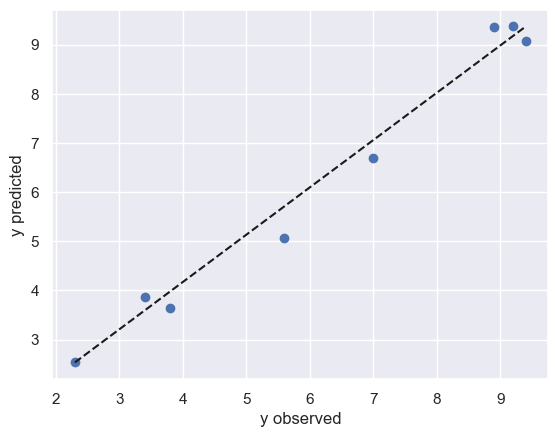

In [42]:
# parity plot
plt.scatter(y , y_hat)
plt.plot([y.min(),y.max()], [y_hat.min(), y_hat.max()], 'k--')
plt.xlabel("y observed")
plt.ylabel("y predicted")

In [30]:
# sigma_hat^2
p = 4 # number of parameters to be estimated
sigma2 = SSR/(n-p)

#covariance matrix of beta
cov_beta = sigma2*np.linalg.inv(X_d.T@X_d)
print(cov_beta)

[[ 1.02626984e+00 -2.24425982e-03 -4.14604427e-02 -7.65779333e-02]
 [-2.24425982e-03  2.04384015e-05 -1.07477801e-03  1.33025803e-04]
 [-4.14604427e-02 -1.07477801e-03  1.05055146e-01 -1.79496738e-03]
 [-7.65779333e-02  1.33025803e-04 -1.79496738e-03  1.03997987e-02]]


In [33]:
# standard errors in estimated beta_hat
se_beta = np.sqrt(np.diag(cov_beta))
print(se_beta)

[1.01304977 0.00452089 0.32412212 0.1019794 ]


In [37]:
# critical t-score
alpha = 0.05 # 95% confidence interval
t_score = stats.t.ppf(1-alpha/2, n-p) # dof=n-p, ppf= percent point function
print(t_score)

2.7764451051977987


In [41]:
# estimating the confidence intervals
lb = beta_hat - t_score*se_beta
ub = beta_hat + t_score*se_beta

# confidence interval
CI = np.column_stack((lb, beta_hat, ub))
print(CI) # which of these are statistically significant? see sign change

[[-7.74373952 -4.93106243 -2.11838535]
 [ 0.03339763  0.04594962  0.05850161]
 [-1.02932676 -0.1294195   0.77048776]
 [-0.02476124  0.25837897  0.54151919]]


In [48]:
#floor area, room ,age
def predict(FA,R,Age):
    X_d = np.array([1,FA,R,Age])
    y_pred = X_d@beta_hat
    return y_pred


y_new = predict(FA =200 , R =3 , Age =5 )
print(y_new)

5.16249726177437
